<a href="https://colab.research.google.com/github/jahnzab/image_classification-of-Dog-vs-cat/blob/main/final_cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"jahanzaieb","key":"bbb4e443e35fe90e1755247d4c45cc08"}'}

In [100]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [101]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [183]:
import zipfile
zip_ref =zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content'
)
zip_ref.close()

In [184]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [185]:
train_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/train',
    labels ='inferred',
    label_mode= 'int',
    batch_size=32,

    image_size=(128,128)


    )
validation_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/test',
    labels ='inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(128,128)


)
############


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [186]:
# Define the normalization process
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
def preprocess(image, label):
    image = tf.cast(image / 255.0, tf.float32)  # Normalize images to [0, 1]
    return image, label

# Apply preprocessing, caching, shuffling, and prefetching
train_ds = train_ds.map(preprocess).cache().shuffle(5000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = validation_ds.map(preprocess).prefetch(buffer_size=tf.data.AUTOTUNE)

# Define data augmentation
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomBrightness, RandomContrast, RandomTranslation

data_augmentation = Sequential([
    RandomFlip("horizontal"),            # Random horizontal flip
    RandomRotation(0.3),                 # Random rotation (up to 20%)
    RandomZoom(0.3),                     # Random zoom (up to 20%)
    RandomBrightness(0.3),               # Random brightness change (up to 20%)
    RandomContrast(0.3),                 # Random contrast adjustment (up to 20%)
    tf.keras.layers.RandomTranslation(height_factor=0.45, width_factor=0.45)  # Random translation (shift)
])




In [187]:
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Flatten())

# Dense layers with both dropout and L2 regularization
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.45))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.45))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,313,857 (12.64 MB)

 Trainable params: 3,313,409 (12.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [188]:
model.compile(
    optimizer='adam',  # Use Adam optimizer
    loss='binary_crossentropy',          # Binary cross-entropy loss for binary classification
    metrics=['accuracy']                 # Track accuracy during training
)

In [189]:
# Callbacks for optimization
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',  factor=0.5, patience=2, min_lr=1e-6)

####

history = model.fit(
    train_ds, epochs=15,               # Training dataset
    validation_data=validation_ds  # Validation dataset
    )

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 26ms/step - accuracy: 0.5378 - loss: 3.6765 - val_accuracy: 0.6180 - val_loss: 1.2220
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.6449 - loss: 1.1264 - val_accuracy: 0.7150 - val_loss: 0.9340
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.7451 - loss: 0.9000 - val_accuracy: 0.7202 - val_loss: 0.9028
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7975 - loss: 0.8329 - val_accuracy: 0.7942 - val_loss: 0.9389
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.8362 - loss: 0.8513 - val_accuracy: 0.7764 - val_loss: 0.9957
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.8515 - loss: 0.8824 - val_accuracy: 0.8200 - val_loss: 0.9241
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.8685 - loss: 0.8375 - val_accuracy: 0.8156 - val_loss: 0.9397
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8805 - loss: 0.8367 - 

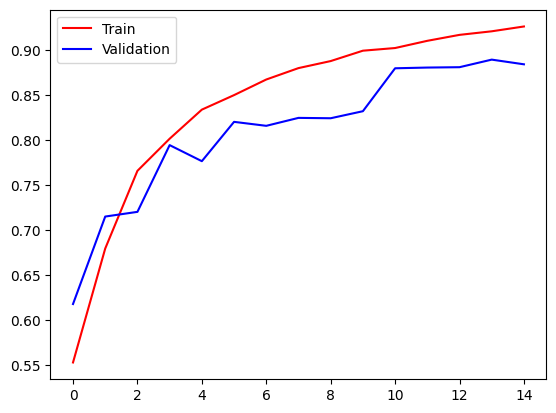

In [190]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train',color='red')
plt.plot(history.history['val_accuracy'], label='Validation',color='blue')
plt.legend()
plt.show()

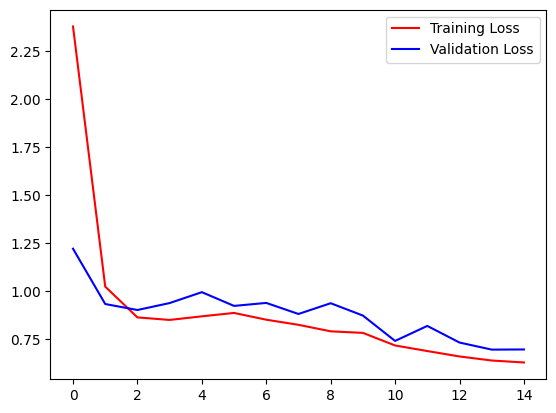

In [191]:
plt.plot(history.history['loss'], label='Training Loss',color='red')
plt.plot(history.history['val_loss'], label='Validation Loss',color='blue')
plt.legend()
plt.show()

In [192]:
from google.colab import files
files.upload()

Saving cat.128.jpg to cat.128.jpg


{'cat.128.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01v\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\x

In [230]:
from google.colab import files
files.upload()

Saving cat.83.jpg to cat.83.jpg


{'cat.83.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01v\x01\xf2\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd

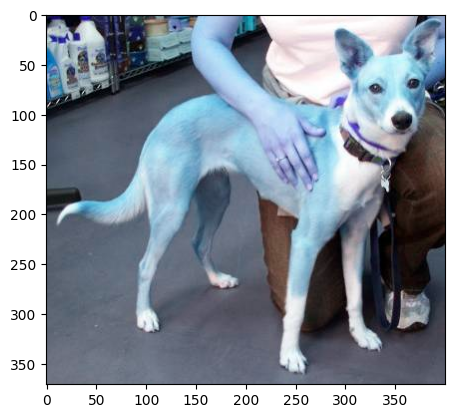

In [238]:
import cv2
test_img = cv2.imread('/content/dog.37.jpg')
plt.imshow(test_img)


In [239]:
test_img.shape
test_img=cv2.resize(test_img,(128,128))
test_input=test_img.reshape((1,128,128,3))
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.9999827]], dtype=float32)

In [240]:
prediction=model.predict(test_input)
if prediction[0] >= 0.5:
    print("It's a dog!")
else:
    print("It's a cat!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
It's a dog!
